# Hospital Readmission Prediction Project

This project aims to predict whether a patient will be readmitted to the hospital within 30 days of discharge using data from 130 US hospitals (1999–2008).  
Early identification of high-risk patients can reduce healthcare costs and improve patient outcomes.

## Project Goals
- Predict 30-day readmission (Binary classification)
- Identify key risk factors
- Present findings through a dashboard and interactive app



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

# Load the dataset
df_train = pd.read_csv('train_df.csv')

# Display the first few rows of the dataframe
df_train.head()


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0


In [ ]:
# Check the shape (rows, columns)
print(f'Dataset Shape: {df_train.shape}')

# Get a summary of the data
df_train.info()

# Check for missing values
print("Missing Values in Each Column:")
print(df_train.isnull().sum())

# Summary statistics for numerical columns
df_train.describe()

# Check the unique values of the target column (readmission status)
print(f"Readmission Value Counts: {df_train['readmitted'].value_counts()}")


Dataset Shape: (5000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                5000 non-null   int64 
 1   gender             5000 non-null   object
 2   primary_diagnosis  5000 non-null   object
 3   num_procedures     5000 non-null   int64 
 4   days_in_hospital   5000 non-null   int64 
 5   comorbidity_score  5000 non-null   int64 
 6   discharge_to       5000 non-null   object
 7   readmitted         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
Missing Values in Each Column:
age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
readmitted           0
dtype: int64
Readmission Value Counts: readmitted
0    4060
1     940
Name: count, dtype: int64


In [ ]:
# One-hot encoding for categorical columns
df_train_encoded = pd.get_dummies(df_train, columns=['gender', 'primary_diagnosis', 'discharge_to'], drop_first=True)

# Check the first few rows after encoding
df_train_encoded.head()


,age,num_procedures,days_in_hospital,comorbidity_score,readmitted,gender_Male,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,69,1,2,1,0,True,False,True,False,False,True,False,False
1,32,2,13,2,0,False,False,False,False,False,False,True,False
2,89,1,7,1,0,True,True,False,False,False,False,False,False
3,78,9,2,2,0,True,False,False,False,False,False,False,True
4,38,6,4,4,0,True,True,False,False,False,False,True,False


In [ ]:
# Define features (X) and target variable (y)
X = df_train_encoded.drop(columns=['readmitted'])
y = df_train_encoded['readmitted']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (4000, 12), y_train shape: (4000,)
X_test shape: (1000, 12), y_test shape: (1000,)


Model Building


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions on the test set:", y_pred[:10])


Predictions on the test set: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8260
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:
[[826   0]
 [174   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Initialize Logistic Regression with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model again
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5000
Precision: 0.1604
Recall: 0.4425
Confusion Matrix:
[[423 403]
 [ 97  77]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize Random Forest model with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Accuracy: 0.8200
Random Forest Precision: 0.0000
Random Forest Recall: 0.0000
Random Forest Confusion Matrix:
[[820   6]
 [174   0]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model with balanced class weights
rf_model_smote = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# Train the model on the resampled data
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_rf_smote = rf_model_smote.predict(X_test)

# Evaluate the model's performance
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

# Display the results
print(f"Random Forest with SMOTE Accuracy: {accuracy_rf_smote:.4f}")
print(f"Random Forest with SMOTE Precision: {precision_rf_smote:.4f}")
print(f"Random Forest with SMOTE Recall: {recall_rf_smote:.4f}")
print("Random Forest with SMOTE Confusion Matrix:")
print(conf_matrix_rf_smote)


Random Forest with SMOTE Accuracy: 0.7320
Random Forest with SMOTE Precision: 0.1781
Random Forest with SMOTE Recall: 0.1494
Random Forest with SMOTE Confusion Matrix:
[[706 120]
 [148  26]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Display the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(best_params)

# Train the Random Forest model using the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Display the results
print(f"Random Forest with Tuning Accuracy: {accuracy_rf_best:.4f}")
print(f"Random Forest with Tuning Precision: {precision_rf_best:.4f}")
print(f"Random Forest with Tuning Recall: {recall_rf_best:.4f}")
print("Random Forest with Tuning Confusion Matrix:")
print(conf_matrix_rf_best)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters found by GridSearchCV:
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest with Tuning Accuracy: 0.7380
Random Forest with Tuning Precision: 0.1857
Random Forest with Tuning Recall: 0.1494
Random Forest with Tuning Confusion Matrix:
[[712 114]
 [148  26]]


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import numpy as np


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model on original (imbalanced) data
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Fit on original training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Precision: {prec:.4f}")
    print(f"{name} Recall: {rec:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.5000
Logistic Regression Precision: 0.1604
Logistic Regression Recall: 0.4425
Logistic Regression Confusion Matrix:
[[423 403]
 [ 97  77]]

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8250
Gradient Boosting Precision: 0.0000
Gradient Boosting Recall: 0.0000
Gradient Boosting Confusion Matrix:
[[825   1]
 [174   0]]

Training XGBoost...
XGBoost Accuracy: 0.7820
XGBoost Precision: 0.1562
XGBoost Recall: 0.0575
XGBoost Confusion Matrix:
[[772  54]
 [164  10]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculate scale_pos_weight = (negative samples) / (positive samples)
import numpy as np
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight,
                          eval_metric='logloss',
                          random_state=42)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already defined
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate scale_pos_weight
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Define and train the XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Precision: {precision:.4f}")
print(f"XGBoost Recall: {recall:.4f}")
print("XGBoost Confusion Matrix:")
print(conf_matrix)


scale_pos_weight: 4.22


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7210
XGBoost Precision: 0.2162
XGBoost Recall: 0.2299
XGBoost Confusion Matrix:
[[681 145]
 [134  40]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [4.22]
}

# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print(f"\nXGBoost Tuned Accuracy: {accuracy:.4f}")
print(f"XGBoost Tuned Precision: {precision:.4f}")
print(f"XGBoost Tuned Recall: {recall:.4f}")
print("XGBoost Tuned Confusion Matrix:")
print(conf_matrix)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 4.22, 'subsample': 1.0}

XGBoost Tuned Accuracy: 0.7360
XGBoost Tuned Precision: 0.1918
XGBoost Tuned Recall: 0.1609
XGBoost Tuned Confusion Matrix:
[[708 118]
 [146  28]]


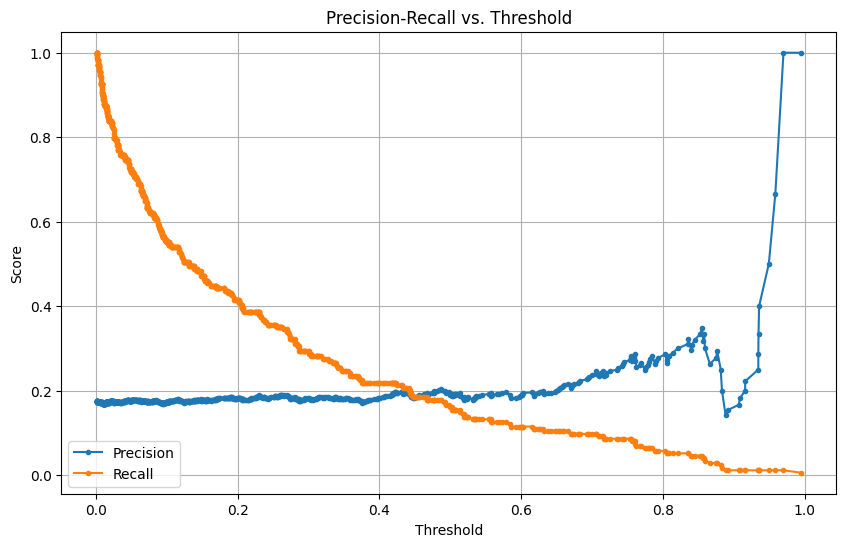

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, confusion_matrix

# Get prediction probabilities for the positive class (1)
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Generate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision and Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", marker='.')
plt.plot(thresholds, recalls[:-1], label="Recall", marker='.')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Set threshold
optimal_threshold = 0.3

# Predict class labels based on threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred_optimal)
prec = precision_score(y_test, y_pred_optimal)
rec = recall_score(y_test, y_pred_optimal)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

print(f"Threshold = {optimal_threshold}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Threshold = 0.3
Accuracy: 0.6490
Precision: 0.1828
Recall: 0.2931
Confusion Matrix:
[[598 228]
 [123  51]]


In [ ]:
best_xgb = grid_search.best_estimator_


In [ ]:
import numpy as np
from sklearn.metrics import recall_score

# Predict probabilities
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Try thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.9, 0.01)
recalls = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))

# Find the best threshold for recall
best_thresh_idx = np.argmax(recalls)
best_thresh = thresholds[best_thresh_idx]
best_recall = recalls[best_thresh_idx]

print(f'🔍 Best threshold for recall: {best_thresh:.2f}')
print(f'📈 Best recall: {best_recall:.4f}')


🔍 Best threshold for recall: 0.10
📈 Best recall: 0.5517


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict with threshold 0.10
y_pred_thresh_010 = (y_proba >= 0.10).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_thresh_010)
precision = precision_score(y_test, y_pred_thresh_010)
recall = recall_score(y_test, y_pred_thresh_010)
cm = confusion_matrix(y_test, y_pred_thresh_010)

print(f'🔎 Threshold = 0.10')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(cm)


🔎 Threshold = 0.10
Accuracy: 0.4610
Precision: 0.1724
Recall: 0.5517
Confusion Matrix:
[[365 461]
 [ 78  96]]


In [ ]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

# Try thresholds from 0.1 to 0.5
thresholds = np.arange(0.1, 0.51, 0.01)
best_f2 = 0
best_threshold = 0

print("Threshold\tF2 Score\tRecall\t\tPrecision")
print("-" * 50)

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"{threshold:.2f}\t\t{f2:.4f}\t\t{recall:.4f}\t\t{precision:.4f}")

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

print("\n📌 Best Threshold based on F2 Score:", round(best_threshold, 2))
print("🏆 Best F2 Score:", round(best_f2, 4))


Threshold	F2 Score	Recall		Precision
--------------------------------------------------
0.10		0.3831		0.5517		0.1724
0.11		0.3827		0.5402		0.1767
0.12		0.3748		0.5230		0.1757
0.13		0.3679		0.5057		0.1760
0.14		0.3614		0.4885		0.1771
0.15		0.3538		0.4713		0.1771
0.16		0.3427		0.4483		0.1765
0.17		0.3422		0.4425		0.1795
0.18		0.3447		0.4425		0.1829
0.19		0.3400		0.4310		0.1843
0.20		0.3303		0.4138		0.1827
0.21		0.3119		0.3851		0.1772
0.22		0.3148		0.3851		0.1821
0.23		0.3187		0.3851		0.1887
0.24		0.3032		0.3621		0.1837
0.25		0.3004		0.3563		0.1845
0.26		0.2993		0.3506		0.1889
0.27		0.2918		0.3391		0.1873
0.28		0.2800		0.3218		0.1842
0.29		0.2594		0.2931		0.1777
0.30		0.2615		0.2931		0.1828
0.31		0.2531		0.2816		0.1801
0.32		0.2503		0.2759		0.1825
0.33		0.2466		0.2701		0.1829
0.34		0.2386		0.2586		0.1822
0.35		0.2304		0.2471		0.1814
0.36		0.2211		0.2356		0.1775
0.37		0.2221		0.2356		0.1806
0.38		0.2081		0.2184		0.1751
0.39		0.2093		0.2184		0.1792
0.40		0.2104		0.2184		0.1836
0.41		0.2113	

In [ ]:
final_y_pred = (y_proba >= 0.1).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, final_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, final_y_pred, digits=4))


Confusion Matrix:
[[365 461]
 [ 78  96]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8239    0.4419    0.5753       826
           1     0.1724    0.5517    0.2627       174

    accuracy                         0.4610      1000
   macro avg     0.4981    0.4968    0.4190      1000
weighted avg     0.7106    0.4610    0.5209      1000



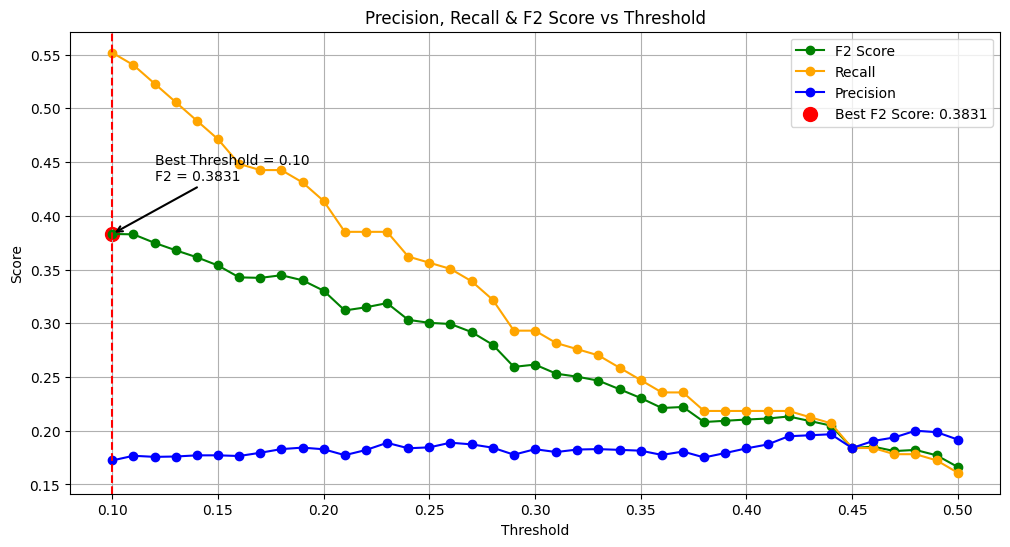

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import fbeta_score, precision_score, recall_score

# Try thresholds from 0.1 to 0.5
thresholds = np.arange(0.1, 0.51, 0.01)
f2_scores = []
precisions = []
recalls = []

best_f2 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    f2_scores.append(f2)
    recalls.append(recall)
    precisions.append(precision)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(thresholds, f2_scores, label='F2 Score', color='green', marker='o')
plt.plot(thresholds, recalls, label='Recall', color='orange', marker='o')
plt.plot(thresholds, precisions, label='Precision', color='blue', marker='o')

# Highlight best threshold
plt.axvline(x=best_threshold, color='red', linestyle='--')
plt.scatter(best_threshold, best_f2, color='red', s=100, label=f'Best F2 Score: {best_f2:.4f}')

# Annotate best point
plt.annotate(f'Best Threshold = {best_threshold:.2f}\nF2 = {best_f2:.4f}',
             xy=(best_threshold, best_f2),
             xytext=(best_threshold + 0.02, best_f2 + 0.05),
             arrowprops=dict(arrowstyle='->', lw=1.5),
             fontsize=10,
             color='black')

plt.title('Precision, Recall & F2 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Optional: Save plot
plt.savefig("threshold_vs_scores.png", dpi=300, bbox_inches='tight')
plt.show()
